In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import  export_graphviz
import pydotplus

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv('C:\\Users\\junge\\Desktop\\Python\\Lab_2\\heart_failure_clinical_records_dataset.csv')

In [6]:
df.columns, df.shape

(Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'ejection_fraction', 'high_blood_pressure', 'platelets',
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
        'DEATH_EVENT'],
       dtype='object'), (299, 13))

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df = df.fillna(df.mean())


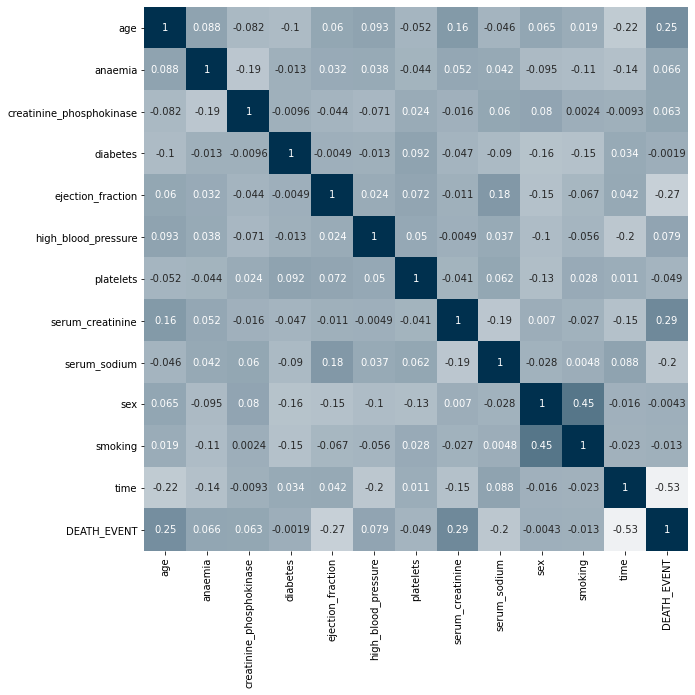

In [10]:
feature_columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'ejection_fraction', 'high_blood_pressure', 'platelets',
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
        'DEATH_EVENT'] 

corr = df[feature_columns].corr()

_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr, 
    cmap=sns.light_palette("#00304e", as_cmap=True), 
    square=True, 
    cbar=False, 
    ax=ax, 
    annot=True, 
    annot_kws={"fontsize": 10}
)

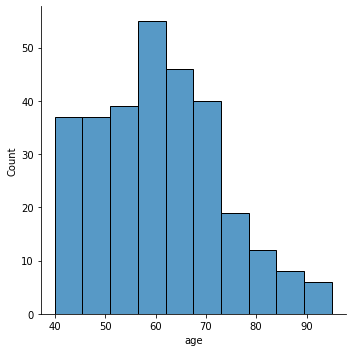

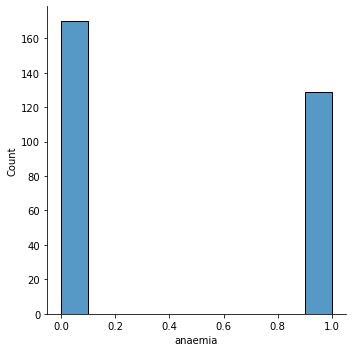

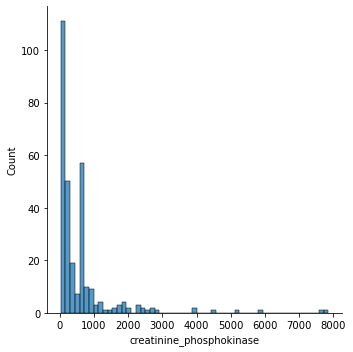

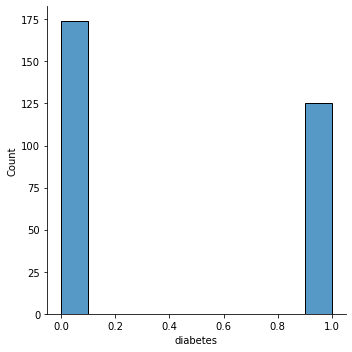

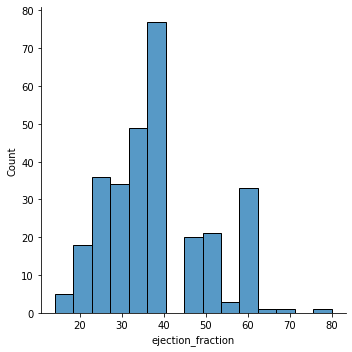

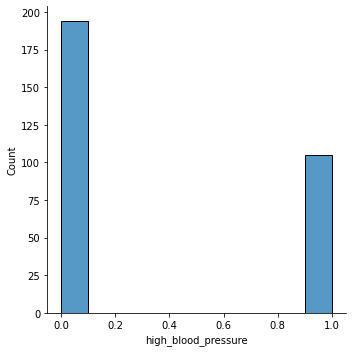

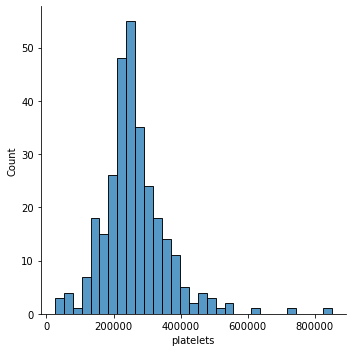

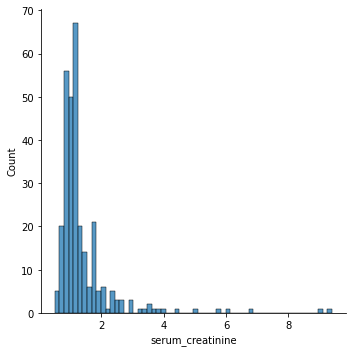

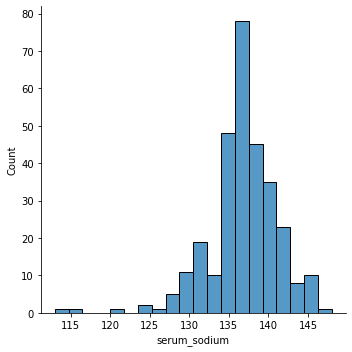

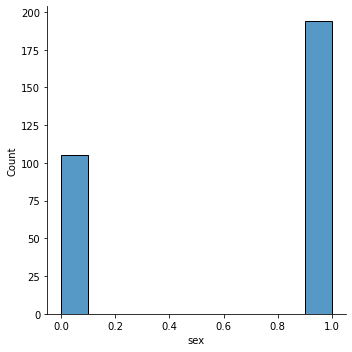

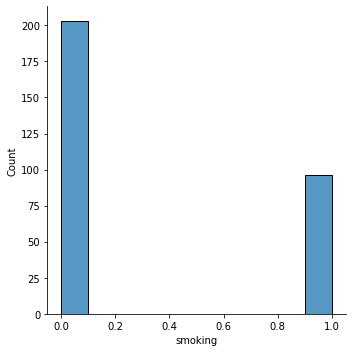

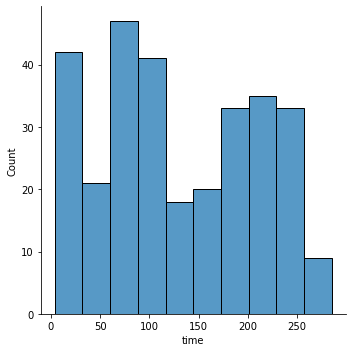

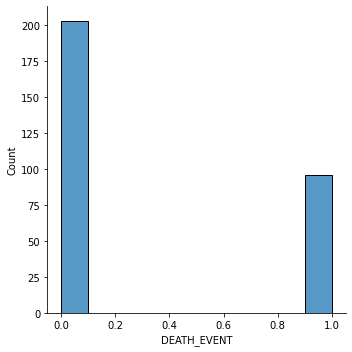

In [11]:
for entry in feature_columns: 
    sns.displot(df, x=entry)

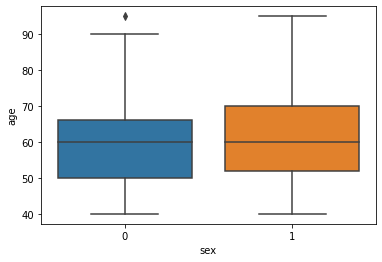

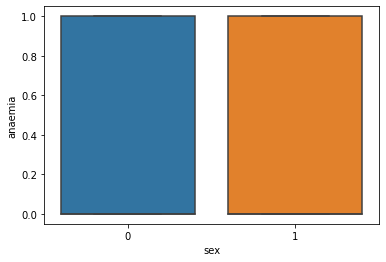

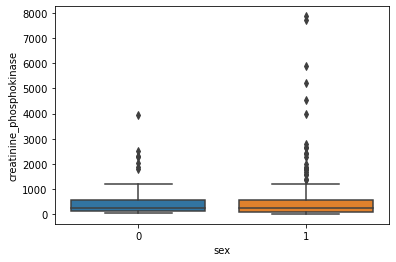

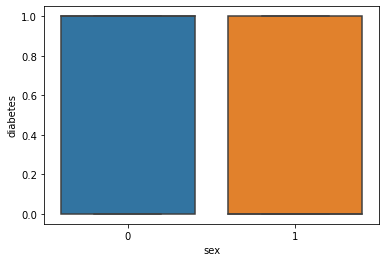

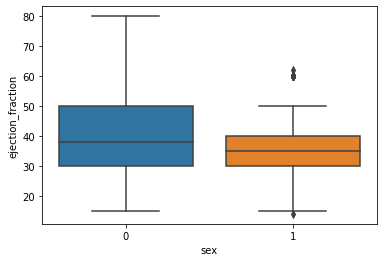

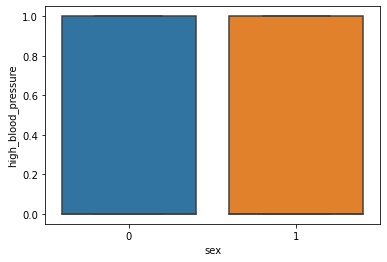

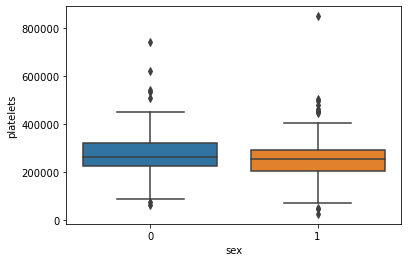

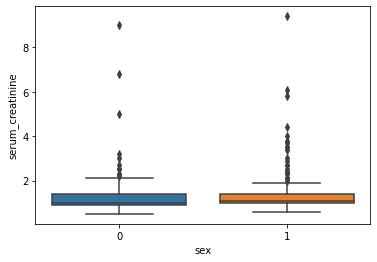

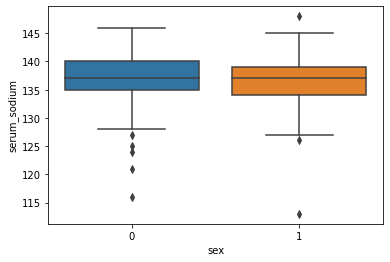

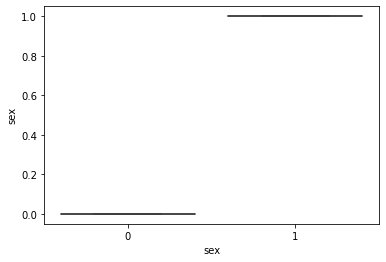

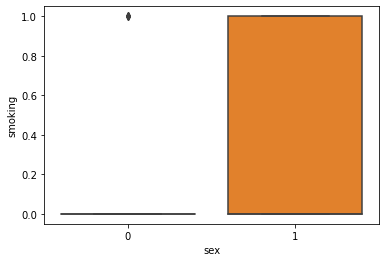

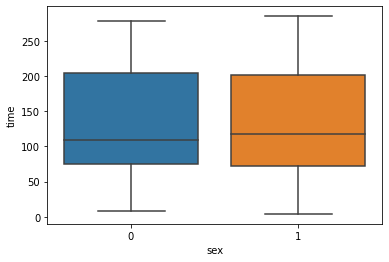

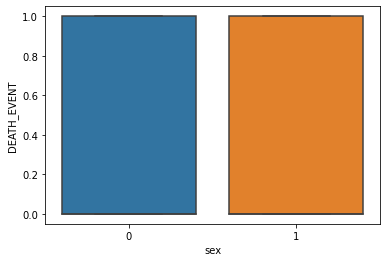

In [18]:
for entry in feature_columns:
    fig = plt.figure()
    ax = sns.boxplot(x="sex", y=entry,data=df)

In [20]:
X = df.drop('sex', axis = 1).values
y = df['sex'].values.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
parameters_knn = {  'model__algorithm' : ['brute'],
                    'model__leaf_size' : [30,50,70,90,110],
                    'model__metric' : ['minkowski'],
                    'model__p' : [1],
                    'model__n_neighbors' : [3,5,11,19],
                    'model__weights' : ['uniform', 'distance'],
                    'model__n_jobs' : [-1]
                 }

parameters_rfc =  { "model__n_estimators": [100,200],
                    "model__max_features": ["auto", "sqrt"],
                    "model__max_depth":[10,20],
                    "model__min_samples_split": [2, 5],
                    "model__min_samples_leaf": [1, 2],
                    "model__bootstrap": [True, False],
                    "model__criterion": ["gini"],
                    "model__random_state" : [42] 
                  }

parameters_ab =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                    "model__learning_rate":[0.5,1,2,3],
                    "model__n_estimators": [50,100,150,200,300],
                    "model__random_state" : [42] 
                 }

parameters_svc = { 'model__kernel' : ['linear','rbf'],
                   'model__C' : [1,10,100,1000,10000],
                   'model__random_state' : [42],
                   'model__gamma' : ['scale','auto']
                 }

parameters_gb =  { "model__n_estimators": [100,200],
                   "model__loss": ['deviance', 'exponential'],
                   "model__learning_rate": [0.1],
                   "model__max_features": ['auto', 'sqrt'],
                   "model__criterion": ['friedman_mse', 'mse', 'mae'],
                   "model__random_state": [42] 
                 }

parameters_dt =  { "model__max_depth": np.arange(1,10),
                   "model__min_samples_leaf": [1, 5, 10, 20],
                   "model__min_samples_split": np.arange(2, 11),
                   "model__criterion": ["gini", "entropy"],
                   "model__random_state" : [42]
                 }

In [24]:
def apply_ml_model(ml_model,parameters, X_train, y_train):
    steps = [
        ('scalar', StandardScaler()),
        ('model', ml_model)
    ]
    model_pipe = Pipeline(steps)

    ml_model = GridSearchCV(model_pipe, parameters, cv = 3, n_jobs = -1)
    ml_model = ml_model.fit(X_train, y_train.ravel())
    
    y_pred_train = ml_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    y_pred_test = ml_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    print("confusion_matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap = 'viridis', fmt='.0f')
    plt.show()
    print("Training set: ", accuracy_train)
    print("Test set: ", accuracy_test)
    print(classification_report(y_test, y_pred_test))
    print(ml_model.best_params_)

confusion_matrix


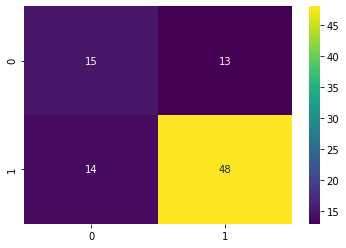

Training set:  0.7129186602870813
Test set:  0.7
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        28
           1       0.79      0.77      0.78        62

    accuracy                           0.70        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.70      0.70      0.70        90

{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 19, 'model__p': 1, 'model__weights': 'uniform'}


In [25]:
ml_model = KNeighborsClassifier()
apply_ml_model(ml_model,parameters_knn, X_train, y_train)

confusion_matrix


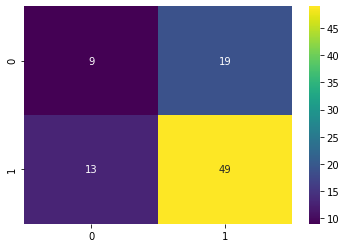

Training set:  1.0
Test set:  0.6444444444444445
              precision    recall  f1-score   support

           0       0.41      0.32      0.36        28
           1       0.72      0.79      0.75        62

    accuracy                           0.64        90
   macro avg       0.56      0.56      0.56        90
weighted avg       0.62      0.64      0.63        90

{'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200, 'model__random_state': 42}


In [26]:
ml_model = RandomForestClassifier()
apply_ml_model(ml_model,parameters_rfc, X_train, y_train)

c:\users\junge\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.67950311 0.66501035 0.66494134 0.66011042 0.66977226 0.6410628
 0.65079365 0.66514838 0.66501035 0.66984127 0.54589372 0.54589372
 0.54589372 0.54589372 0.54589372 0.39240856 0.39240856 0.39240856
 0.39240856 0.39240856 0.65534852 0.65065562 0.65065562 0.6363009
 0.66501035 0.66501035 0.64582471 0.6363009  0.65058661 0.63616287
 0.66017943 0.65534852 0.65534852 0.65534852 0.65534852        nan
        nan        nan        nan        nan]
  warnings.warn(


confusion_matrix


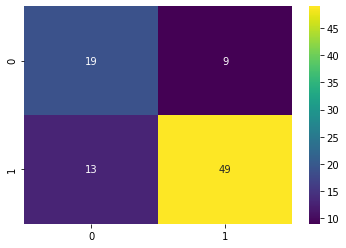

Training set:  0.8564593301435407
Test set:  0.7555555555555555
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        28
           1       0.84      0.79      0.82        62

    accuracy                           0.76        90
   macro avg       0.72      0.73      0.73        90
weighted avg       0.77      0.76      0.76        90

{'model__algorithm': 'SAMME.R', 'model__learning_rate': 0.5, 'model__n_estimators': 50, 'model__random_state': 42}


In [27]:
ml_model = AdaBoostClassifier()
apply_ml_model(ml_model,parameters_ab, X_train, y_train)

confusion_matrix


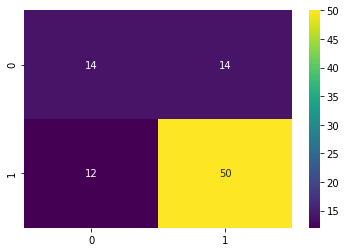

Training set:  0.7272727272727273
Test set:  0.7111111111111111
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        28
           1       0.78      0.81      0.79        62

    accuracy                           0.71        90
   macro avg       0.66      0.65      0.66        90
weighted avg       0.71      0.71      0.71        90

{'model__C': 10000, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__random_state': 42}


In [28]:
ml_model = SVC()
apply_ml_model(ml_model,parameters_svc, X_train, y_train)

confusion_matrix


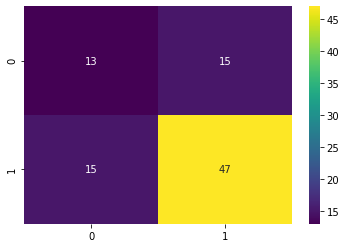

Training set:  1.0
Test set:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.46      0.46      0.46        28
           1       0.76      0.76      0.76        62

    accuracy                           0.67        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.67      0.67      0.67        90

{'model__criterion': 'friedman_mse', 'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__max_features': 'sqrt', 'model__n_estimators': 200, 'model__random_state': 42}


In [29]:
ml_model = GradientBoostingClassifier()
apply_ml_model(ml_model,parameters_gb, X_train, y_train)

confusion_matrix


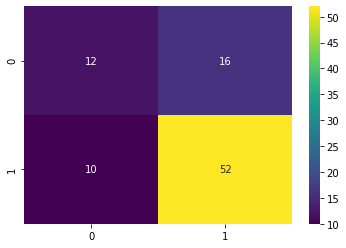

Training set:  0.7320574162679426
Test set:  0.7111111111111111
              precision    recall  f1-score   support

           0       0.55      0.43      0.48        28
           1       0.76      0.84      0.80        62

    accuracy                           0.71        90
   macro avg       0.66      0.63      0.64        90
weighted avg       0.70      0.71      0.70        90

{'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 20, 'model__min_samples_split': 2, 'model__random_state': 42}


In [30]:
ml_model = DecisionTreeClassifier()
apply_ml_model(ml_model,parameters_dt, X_train, y_train)